**Simple Linear Regression**
 
Linear Regression is a statistical technique which is used to find the linear relationship between dependent and one or more independent variables. This technique is applicable for Supervised learning Regression problems where we try to predict a continuous variable.
Linear Regression can be further classified into two types – Simple and Multiple Linear Regression. It is the simplest form of Linear Regression where we fit a straight line to the data.


Simple Linear Regression (SLR)
Simple Linear Regression (or SLR) is the simplest model in machine learning. It models the linear relationship between the independent and dependent variables.

The regression line is the one which minimizes the error function. Such an error function is also called a Cost function.

Independent or Input variable (X) = Feature variable = Predictor variable

Dependent or Output variable (y) = Target variable = Response variable

**Note** : Standardization of data is a good(only of independent features).


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data=pd.DataFrame({"A":[1,2,3,4,5,6,7,8,9],"B":[11,12.5,13,14,15.5,16,17,18.8,19.9]})
data

,A,B
0,1,11.0
1,2,12.5
2,3,13.0
3,4,14.0
4,5,15.5
5,6,16.0
6,7,17.0
7,8,18.8
8,9,19.9


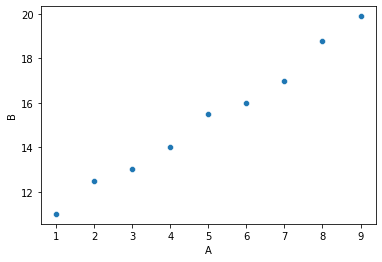

In [3]:
sns.scatterplot(data=data,x="A",y="B")

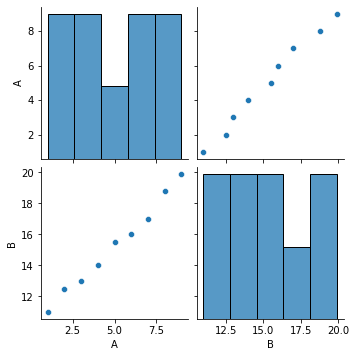

In [4]:
sns.pairplot(data)

In [5]:
x=data["A"].values.reshape(-1,1)
y=data["B"].values.reshape(-1,1)

In [6]:
x

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [7]:
y

array([[11. ],
       [12.5],
       [13. ],
       [14. ],
       [15.5],
       [16. ],
       [17. ],
       [18.8],
       [19.9]])

**Note : Scaling is must**

In [8]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[-1.54919334],
       [-1.161895  ],
       [-0.77459667],
       [-0.38729833],
       [ 0.        ],
       [ 0.38729833],
       [ 0.77459667],
       [ 1.161895  ],
       [ 1.54919334]])

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [10]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
# Predict on the test data



LinearRegression()

In [11]:
y_pred=lr.predict(X_test)
y_pred

array([[18.53061224],
       [11.96734694],
       [16.34285714]])

In [12]:
y_test

array([[18.8],
       [12.5],
       [16. ]])

In [13]:
print(lr.coef_) # —-> To get the value of slope
print(lr.intercept_) #—-> To get the value of intercept


[[2.82437969]]
[15.24897959]


# **Regression metrics for model performance.**

For regression problems, there are two ways to compute the model performance. 

They are RMSE (Root Mean Square Error) and R-Squared Value.
 
1. RMSE (for best—> 0)
  
  lower values of RMSE indicate better fit of data. 


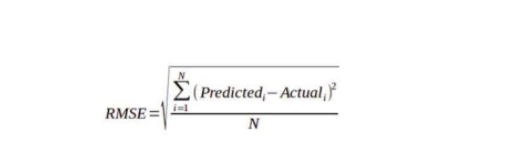


In [14]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test , lr.predict(X_test))
rmse=np.sqrt(mse)
rmse


0.39742507329009025

2. R-Squared
In general, the higher the R2 Score value, the better the model fits the data. Usually, its value ranges from 0 to 1. So, we want its value to be as close to 1. Its value can become negative if our model is wrong.

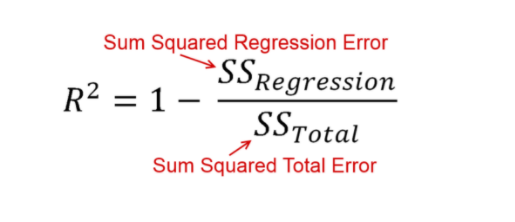
 
SSregression  = sum (square(actual - predicted))

SSTotal  = sum (square(mean(actual) - predicted))

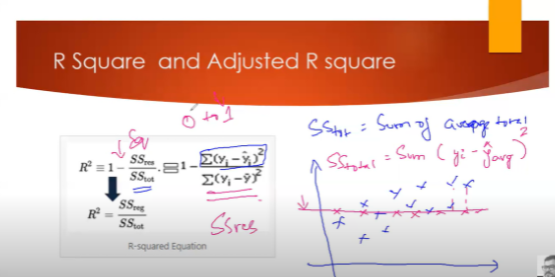

If R2 value is less than zero then that means our model is worse than the average fitted one.



**Adjusted R2**


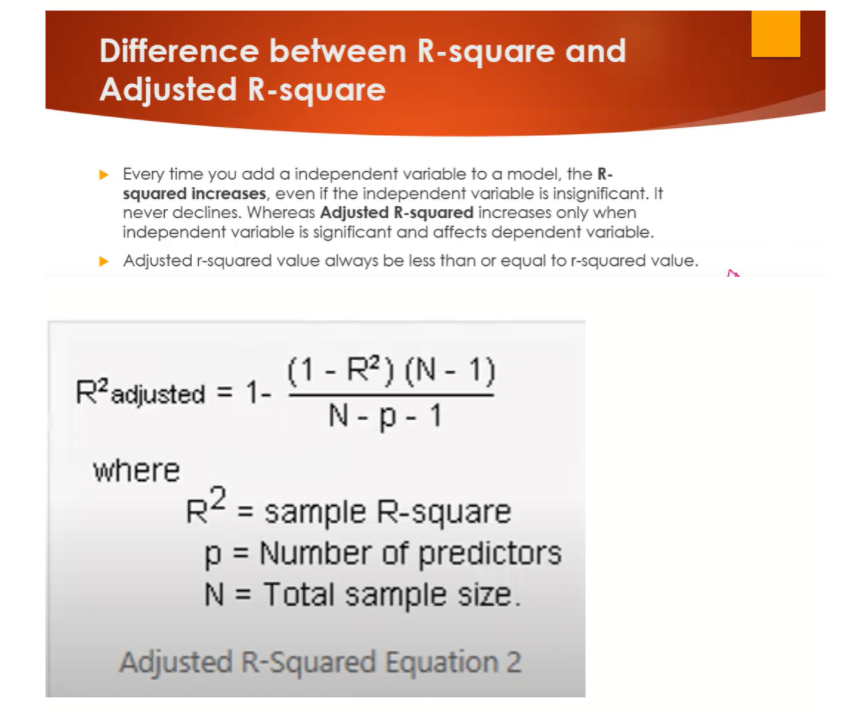

In [15]:
from sklearn.metrics import r2_score
r2_score(y_test , lr.predict(X_test))
lr.score(X_train,y_train) #—--> accuracy Percentage of model


0.9924142981498625

In business decisions, the benchmark for the R2 score value is 0.7. It means if R2 score value >= 0.7, then the model is good enough to deploy on unseen data whereas if R2 score value < 0.7, then the model is not good enough to deploy. Our R2 score value has been found to be .9924. It means that this model explains 99.24 % of the variance in our dependent variable. So, the R2 score value confirms that the model is good enough to deploy because it provides good fit to the data.

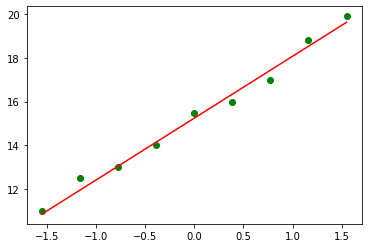

In [16]:
import matplotlib.pyplot as plt

plt.plot(x,lr.predict(x),color="r")
plt.scatter(x,y,color="g")


**Residual analysis**


If the data points in a residual plot are randomly dispersed around the horizontal axis and an approximate zero residual mean, a linear regression model may be appropriate for the data. Otherwise a non-linear model may be more appropriate.


***Underfitting: ***

Your model is underfitting the training data when the model performs poorly on the training data. This is because the model is unable to capture the relationship between the input examples (often called X) and the target values (often called Y).

**Overfitting: ***

*Your model is overfitting your training data when you see that the model performs well on the training data but does not perform well on the evaluation data. This is because the model is memorizing the data it has seen and is unable to generalize to unseen examples.


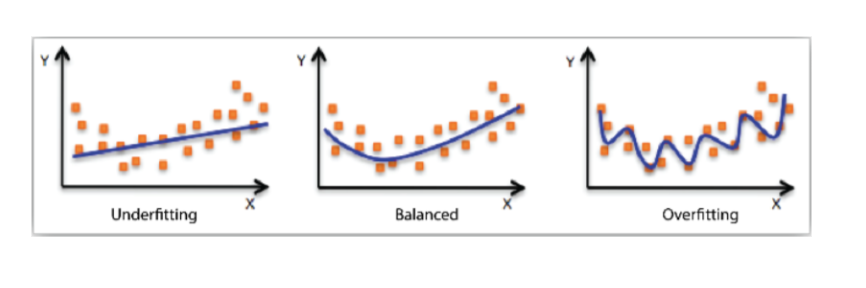

In [17]:
# Checking for Overfitting or Underfitting the data
 
print("Training set score: {:.4f}".format(lr.score(X_train,y_train)))
 
print("Test set score: {:.4f}".format(lr.score(X_test,y_test)))
 


Training set score: 0.9924
Test set score: 0.9762


# **Model Assumptions(SLR)**

**i. Linear relationship**
The relationship between response and feature variables should be linear. This linear relationship assumption can be tested by plotting a scatter-plot between response and feature variables.

**ii. Multivariate normality**
The linear regression model requires all variables to be multivariate normal. A multivariate normal distribution means a vector in multiple normally distributed variables, where any linear combination of the variables is also normally distributed.

**iii. No or little multicollinearity**
It is assumed that there is little or no multicollinearity in the data. Multicollinearity occurs when the features (or independent variables) are highly correlated.

**iv. No auto-correlation** 
Also, it is assumed that there is little or no auto-correlation in the data. Autocorrelation occurs when the residual errors are not independent from each other.

**v. Homoscedasticity**
Homoscedasticity describes a situation in which the error term (that is, the noise in the model) is the same across all values of the independent variables. It means the residuals are the same across the regression line. It can be checked by looking at the scatter plot.


# **Multiple Linear Regression**
 
**Advantages/Features of Multiple Linear Regression**


The chances of getting a better-fit increase as the generated models are dependent on more than 1 feature

Multiple Linear Regression can detect outliers and anomalies very effectively.

**Disadvantages/Shortcomings of Multiple Linear Regression**


The problem of overfitting is very prevalent here, as we can use all features to generate the model, so the model can start "memorizing" the values

Accuracy decreases as the linearity of the dataset decreases.
 
 
**Assumptions:**

**Linearity:** There is a linear relationship between the dependent variables and the independent variables.

**Correlation:** The independent variables are not too highly correlated with each other.

**yi observations** are selected independently and randomly from the population.

**Normal Distribution:** Residuals should be normally distributed with a mean of 0 and variance σ.


**Building a linear model (using stats module)**


In [18]:
import statsmodels.api as sm
# Adding a constant column to our X_train dataframe
X_train = sm.add_constant(X_train)
# create a first fitted model
lm_1 = sm.OLS(y_train,X_train)
results=lm_1.fit()

#Let's see the summary of our first linear model



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [19]:
results.params

array([15.24897959,  2.82437969])

In [20]:
results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     523.3
Date:                Thu, 10 Feb 2022   Prob (F-statistic):           2.16e-05
Time:                        08:15:40   Log-Likelihood:               -0.18360
No. Observations:                   6   AIC:                             4.367
Df Residuals:                       4   BIC:                             3.951
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.2490      0.125    121.993      0.000      14.902      15.596
x1             2.8244      0.123     22.876      0.000       2.482       3.167
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.278
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.511
Skew:                          -0.521   Prob(JB):                        0.775
Kurtosis:                       2.020   Cond. No.                         1.07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The p value of 0 for x1 is saying there is a 0% chance the Wealth variable has no affect on the dependent variable, y, and our results are produced by chance. 

**Ridge regression**

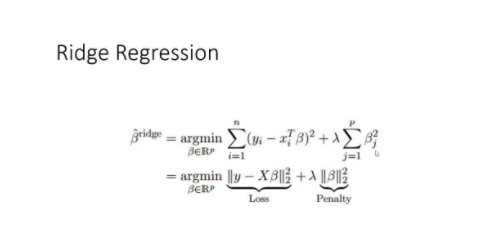

**Lasso Regression**

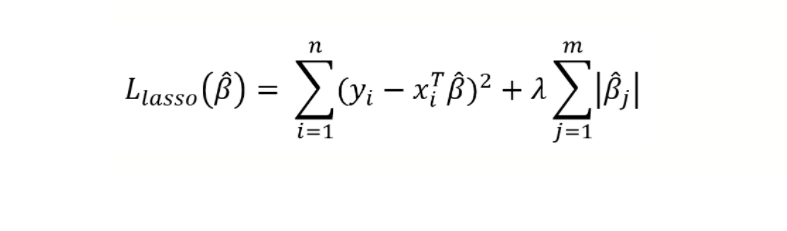

In [21]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)


Lasso(alpha=0.1)

In [22]:
from sklearn import linear_model
ridge_reg = linear_model.Ridge(alpha=0.1)
ridge_reg.fit(X_train, y_train)


Ridge(alpha=0.1)

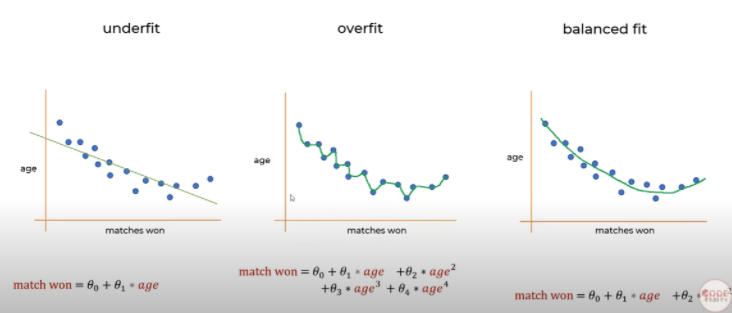

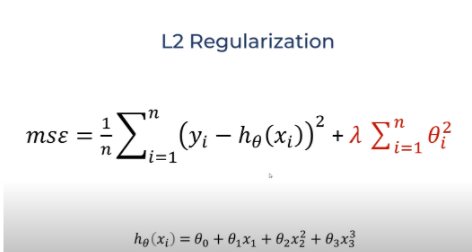

# Polynomial Regression (Non Linear dataset)


In [23]:
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 
 
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)
model = LinearRegression()
 
model. fit(x_poly, y)
 
y_poly_pred = model.predict(x_poly)


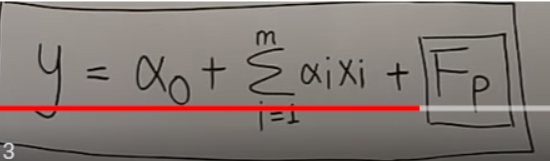